In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint

from mpl_toolkits.mplot3d import Axes3D
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_predict

# Load Data

In [6]:
# Load
df = pd.read_csv('./csv/rgb/2020/jan/result_pixel_217000.csv')

In [7]:
df.describe()

,Brightness,Greenness,Wetness,Label
count,217626.000000,217626.000000,217626.000000,217626.000000
mean,2146.760631,-264.869231,-1578.996321,2.061624
std,1289.900940,295.955791,577.806213,0.833372
min,331.688900,-4708.738300,-11135.087000,0.000000
25%,1628.154250,-361.931125,-1746.483450,2.000000
50%,1797.466800,-284.037400,-1531.975500,2.000000
75%,2067.637175,-215.522825,-1373.627300,2.000000
max,22401.303000,1236.921300,364.448100,4.000000


In [8]:
df.dtypes

Brightness    float64
Greenness     float64
Wetness       float64
Label           int64
dtype: object

In [9]:
grouped_data = df.groupby('Label')
grouped_data.size()

Label
0     17687
1      8015
2    143327
3     40394
4      8203
dtype: int64

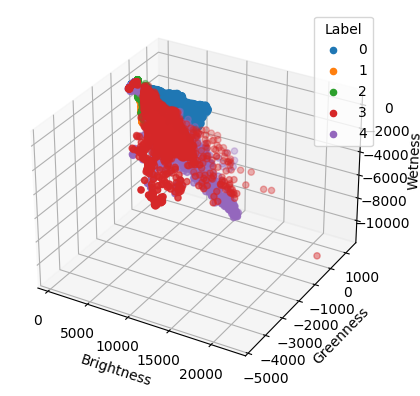

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = df['Label'].unique()

for label in classes:
    ax.scatter(df[df['Label'] == label]['Brightness'],
               df[df['Label'] == label]['Greenness'],
               df[df['Label'] == label]['Wetness'],
               label=label)

ax.set_xlabel('Brightness')
ax.set_ylabel('Greenness')
ax.set_zlabel('Wetness')

# Show the plot
plt.legend(title='Label', loc='upper right', labels=classes)
plt.show()

# Data Preprocessing

In [11]:
# Separate features and labels
X = df[['Brightness', 'Greenness', 'Wetness']]
y = df['Label']

# Create the RandomUnderSampler object
under_sampler = RandomUnderSampler(random_state=42)

# Perform undersampling on the majority class
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

In [12]:
print(X_resampled)
print(y_resampled) 

        Brightness  Greenness    Wetness
13535    5969.2050   791.4196 -2843.7632
4990     5605.2680   716.4937 -2734.3076
17550    5034.2666   298.4626 -2407.3590
733       734.6192  -637.8884   205.9981
6703     4430.3726   327.8220 -2167.4330
...            ...        ...        ...
215925    591.9896  -533.1824   132.4192
214812    652.2840  -589.3442   134.1629
210122   7435.2800    28.5162 -3589.2540
216193    599.6347  -539.0897   132.7853
215760    592.3669  -538.9637   120.0431

[40075 rows x 3 columns]
13535     0
4990      0
17550     0
733       0
6703      0
         ..
215925    4
214812    4
210122    4
216193    4
215760    4
Name: Label, Length: 40075, dtype: int64


In [13]:
# Convert the undersampled data back to a DataFrame
undersampled_df = pd.DataFrame(data={
    'Brightness': X_resampled['Brightness'],
    'Greenness': X_resampled['Greenness'], 
    'Wetness': X_resampled['Wetness'], 
    'Label': y_resampled,
})

print("\nOriginal class distribution:")
print(df['Label'].value_counts())

print("\nUndersampled class distribution:")
print(undersampled_df['Label'].value_counts())
print(undersampled_df)


Original class distribution:
Label
2    143327
3     40394
0     17687
4      8203
1      8015
Name: count, dtype: int64

Undersampled class distribution:
Label
0    8015
1    8015
2    8015
3    8015
4    8015
Name: count, dtype: int64
        Brightness  Greenness    Wetness  Label
13535    5969.2050   791.4196 -2843.7632      0
4990     5605.2680   716.4937 -2734.3076      0
17550    5034.2666   298.4626 -2407.3590      0
733       734.6192  -637.8884   205.9981      0
6703     4430.3726   327.8220 -2167.4330      0
...            ...        ...        ...    ...
215925    591.9896  -533.1824   132.4192      4
214812    652.2840  -589.3442   134.1629      4
210122   7435.2800    28.5162 -3589.2540      4
216193    599.6347  -539.0897   132.7853      4
215760    592.3669  -538.9637   120.0431      4

[40075 rows x 4 columns]


In [14]:
data = undersampled_df

In [15]:
data

,Brightness,Greenness,Wetness,Label
13535,5969.2050,791.4196,-2843.7632,0
4990,5605.2680,716.4937,-2734.3076,0
17550,5034.2666,298.4626,-2407.3590,0
733,734.6192,-637.8884,205.9981,0
6703,4430.3726,327.8220,-2167.4330,0
...,...,...,...,...
215925,591.9896,-533.1824,132.4192,4
214812,652.2840,-589.3442,134.1629,4
210122,7435.2800,28.5162,-3589.2540,4
216193,599.6347,-539.0897,132.7853,4


In [16]:
grouped_data = data.groupby('Label')
grouped_data.size()

Label
0    8015
1    8015
2    8015
3    8015
4    8015
dtype: int64

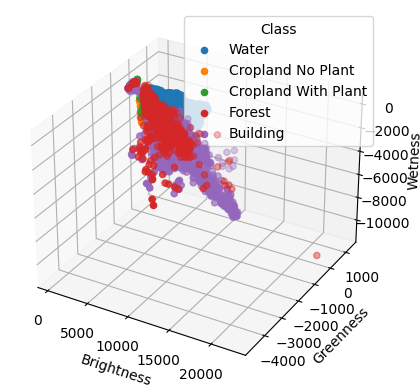

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

classes = data['Label'].unique()
classes_name = [
    "Water",
    "Cropland No Plant",
    "Cropland With Plant",
    "Forest",
    "Building",
]

for label in classes:
    # if(label == 3):
        ax.scatter(data[data['Label'] == label]['Brightness'],
                data[data['Label'] == label]['Greenness'],
                data[data['Label'] == label]['Wetness'],
                label=label)

ax.set_xlabel('Brightness')
ax.set_ylabel('Greenness')
ax.set_zlabel('Wetness')

# Show the plot
plt.legend(title='Class', loc='upper right', labels=classes_name)
plt.show()

# Setup data for Training and Testing

In [18]:
X = data[['Brightness', 'Greenness', 'Wetness']]
y = data['Label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Model and Training Model

In [20]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    max_leaf_nodes=4,
    max_features='log2',
    min_samples_split=2,
    min_samples_leaf=3,
)

In [21]:
actual_model = rf.fit(X_train, y_train)

In [22]:
predicted_labels = cross_val_predict(actual_model, X, y, cv=10)

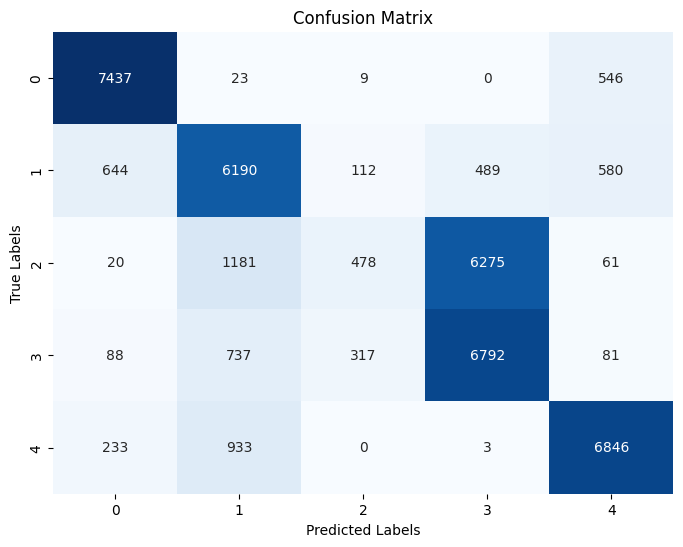

In [23]:
cm = confusion_matrix(y, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [24]:
report = classification_report(y, predicted_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8015
           1       0.68      0.77      0.72      8015
           2       0.52      0.06      0.11      8015
           3       0.50      0.85      0.63      8015
           4       0.84      0.85      0.85      8015

    accuracy                           0.69     40075
   macro avg       0.69      0.69      0.64     40075
weighted avg       0.69      0.69      0.64     40075



In [25]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y, predicted_labels)
print("Kappa Cohen :", kappa)

Kappa Cohen : 0.6153462258265752


# Save Model

In [26]:
import joblib
model_output_file = './model/model5_baru'
joblib.dump(actual_model, f'{model_output_file}.joblib')

['./model/model5_baru.joblib']

# Predicting every pixel

In [27]:
import rasterio
import joblib
import pandas as pd
import numpy as np

loaded_model = joblib.load('./model/model5_baru.joblib')

In [28]:
list = []

with rasterio.open('./qgis/clipped_tc_jan_2.tif') as src:

    metadata = src.meta

    data_brightness = src.read(1)
    data_greenness = src.read(2)
    data_wetness = src.read(3)

    for row in range(data_brightness.shape[0]):
        rows = []
        for col in range(data_brightness.shape[1]):
            pixel = pd.DataFrame({
                'Brightness': [data_brightness[row][col]],
                'Greenness': [data_greenness[row][col]],
                'Wetness': [data_wetness[row][col]]
            })
            result = loaded_model.predict(pixel)
            rows.append(result[0])
        list.append(rows)
        print(f"complete appending row : {row}")

    new_array = np.array(list)

    output_tif_path = './output/lulc/rf_baru_jan_2020.tif'

    metadata.update({
        'count': 1,
        'dtype': new_array.dtype.name
    })

    # Create the new GeoTIFF file and write the new array
    with rasterio.open(output_tif_path, 'w', **metadata) as dst:
        dst.write(new_array, 1)
    print(f"All Finish")

complete appending row : 0
complete appending row : 1
complete appending row : 2
complete appending row : 3
complete appending row : 4
complete appending row : 5
complete appending row : 6
complete appending row : 7
complete appending row : 8
complete appending row : 9
complete appending row : 10
complete appending row : 11
complete appending row : 12
complete appending row : 13
complete appending row : 14
complete appending row : 15
complete appending row : 16
complete appending row : 17
complete appending row : 18
complete appending row : 19
complete appending row : 20
complete appending row : 21
complete appending row : 22
complete appending row : 23
complete appending row : 24
complete appending row : 25
complete appending row : 26
complete appending row : 27
complete appending row : 28
complete appending row : 29
complete appending row : 30
complete appending row : 31
complete appending row : 32
complete appending row : 33
complete appending row : 34
complete appending row : 35
co